In [1]:
import json
import numpy as np
import os
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

In [2]:
df = np.load('../qm9_filtered.npy', allow_pickle = True)

In [3]:
df_X_0 = []
df_y_0 = []
df_X_1 = []
df_y_1 = []

for line in df:
    num = len(line['chiral_centers'])
    if num > 1:
        continue
    elif num == 0:
        df_X_0.append(line['xyz'].flatten())
        df_y_0.append(num)
    elif num == 1:
        df_X_1.append(line['xyz'].flatten())
        df_y_1.append(num)
    
df_X_0 = np.array(df_X_0)
df_y_0 = np.array(df_y_0)
df_X_1 = np.array(df_X_1)
df_y_1 = np.array(df_y_1)

idx_0 = np.random.choice(np.arange(len(df_y_0)), 22500, replace=False)
df_X_0 = df_X_0[idx_0]
df_y_0 = df_y_0[idx_0]

idx_1 = np.random.choice(np.arange(len(df_y_1)), 22500, replace=False)
df_X_1 = df_X_1[idx_1]
df_y_1 = df_y_1[idx_1]

df_X = np.concatenate((df_X_0, df_X_1), axis=0)
df_y = np.concatenate((df_y_0, df_y_1), axis=0)

In [4]:
print(len(df_X), len(df_y))

45000 45000


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2)

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_train_pred = clf.predict(X_train)

print("Train acc: ", accuracy_score(y_train, y_train_pred))
print("test acc: ", accuracy_score(y_test, y_pred))
print("f1: ", f1_score(y_test, y_pred))


Train acc:  1.0
test acc:  0.8603333333333333
f1:  0.8647950951919973


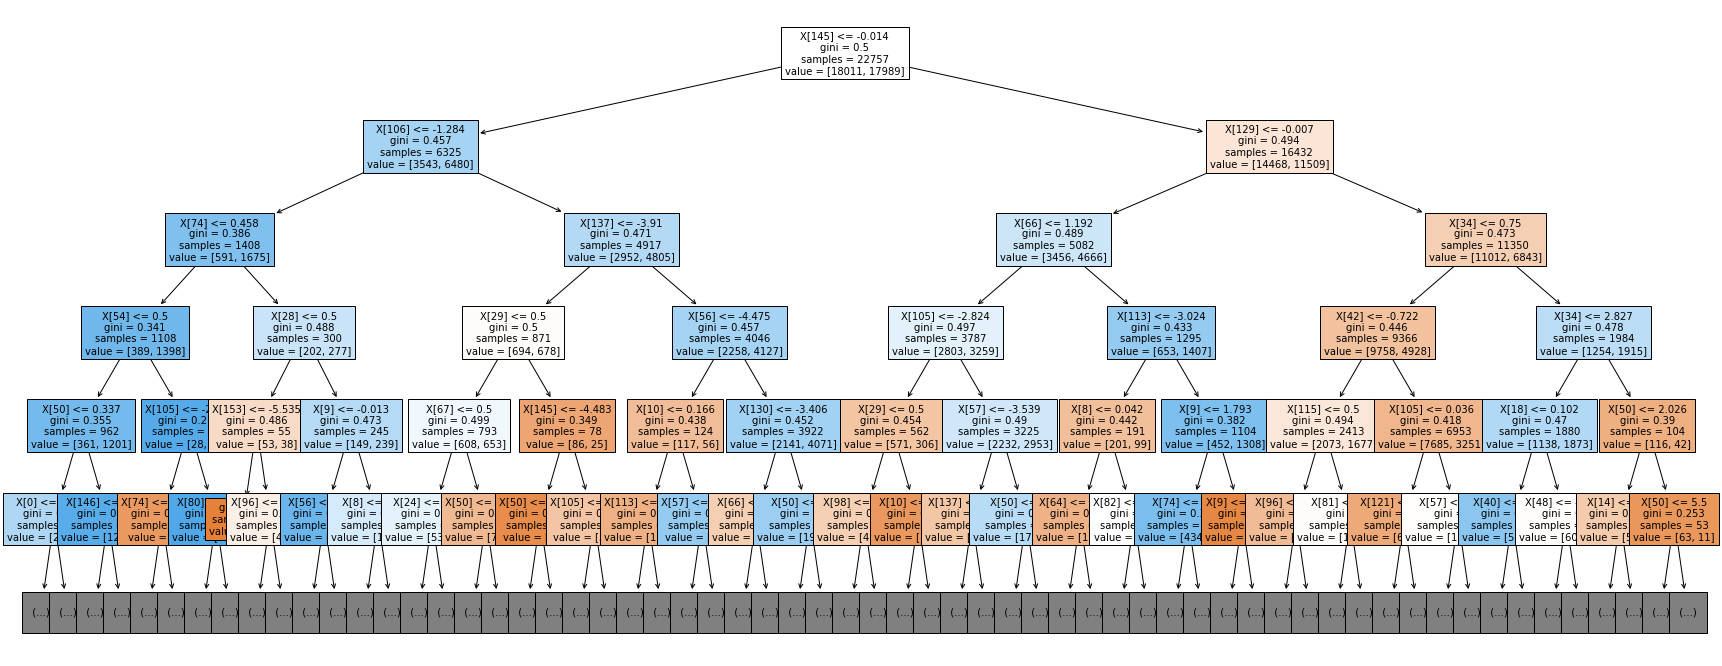

In [10]:
from sklearn import tree

estimator = clf.estimators_[5]

plt.figure(figsize=(30,12))
tree.plot_tree(estimator, max_depth = 5, filled = True, fontsize = 10)
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[3723,  704],
       [ 553, 4020]])